In [18]:
import matplotlib.pyplot as plt; plt.rcParams["figure.figsize"] = (30,15)
import pandas as pd
import pickle
from tsclustering.functions import *
from tsclustering.kmeans import KMeans
from sklearn.metrics import rand_score, adjusted_rand_score

In [19]:
# Loading Sample Time Series Data 
with open('./data/sample_data/X.pickle','rb') as file:
    X = pickle.load(file)
with open('./data/sample_data/y.pickle','rb') as file:
    y = pickle.load(file)

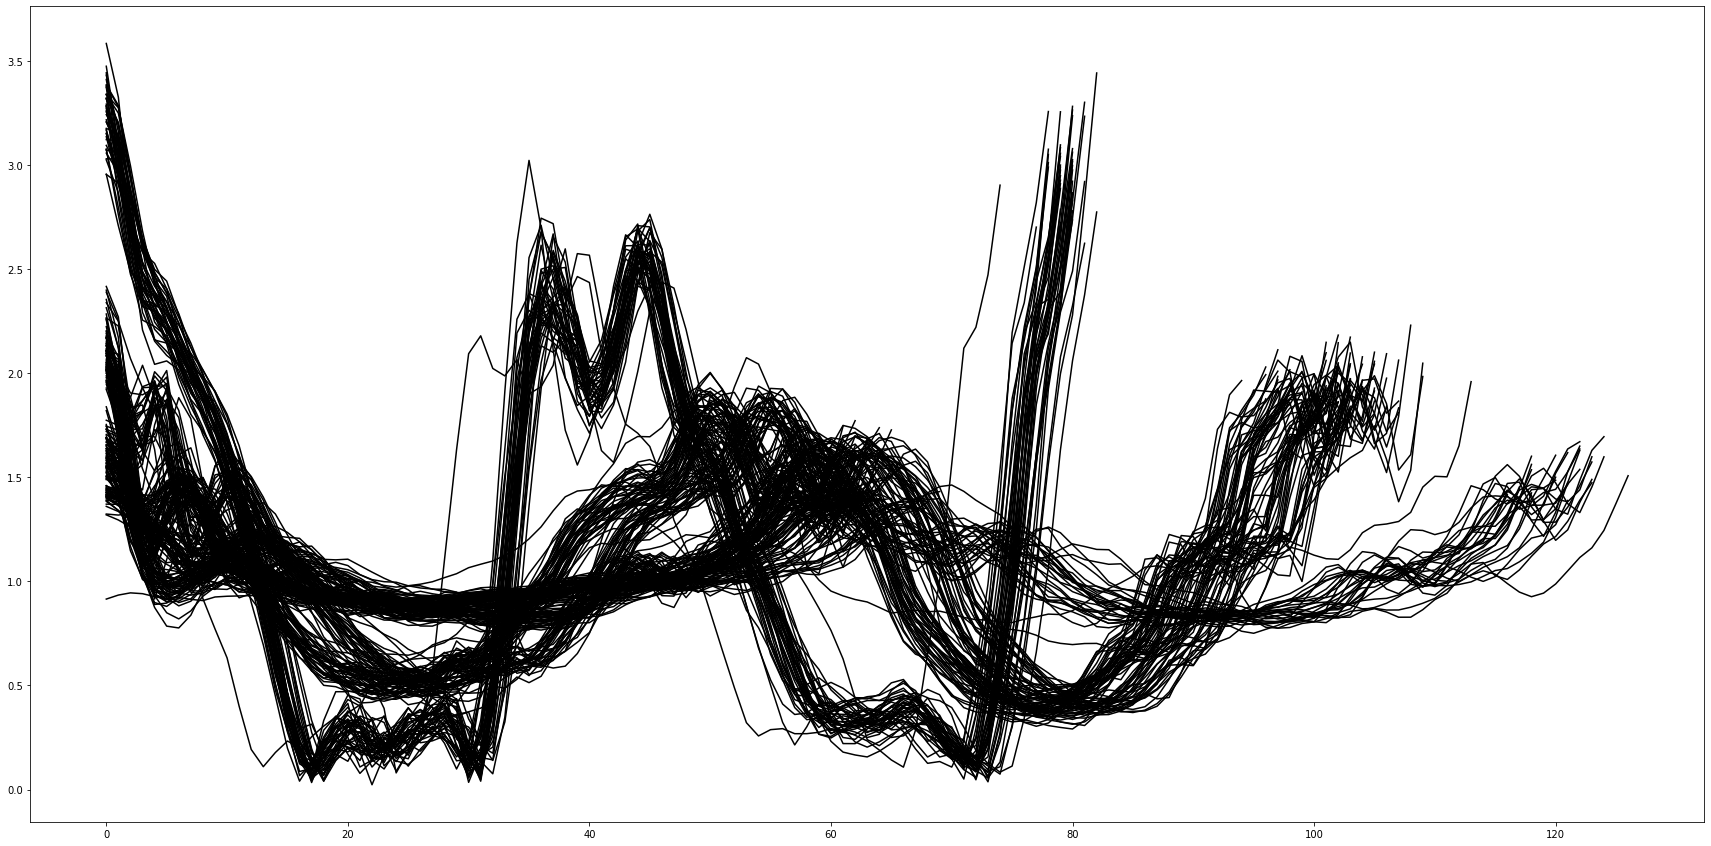

In [20]:
# Plotting sample data

for x in X:
    plt.plot(x, color = 'black');

In [21]:
# Clustering with KMeans

km = KMeans(k_clusters = 3, n_init = 10, max_iter = 100, centroids = [], metric = 'dtw', averaging = 'interpolated')
km.fit(X)

In [22]:
# Calculate the inertia

km._get_inertia()

130.45398748489873

In [23]:
# Using sklearn to evaluate clustering using ground-truth clusters

print('Rand Index:', round(rand_score(km.clusters, y),2))
print('Adjusted RI:', round(adjusted_rand_score(km.clusters, y),2))

Rand Index: 1.0
Adjusted RI: 1.0


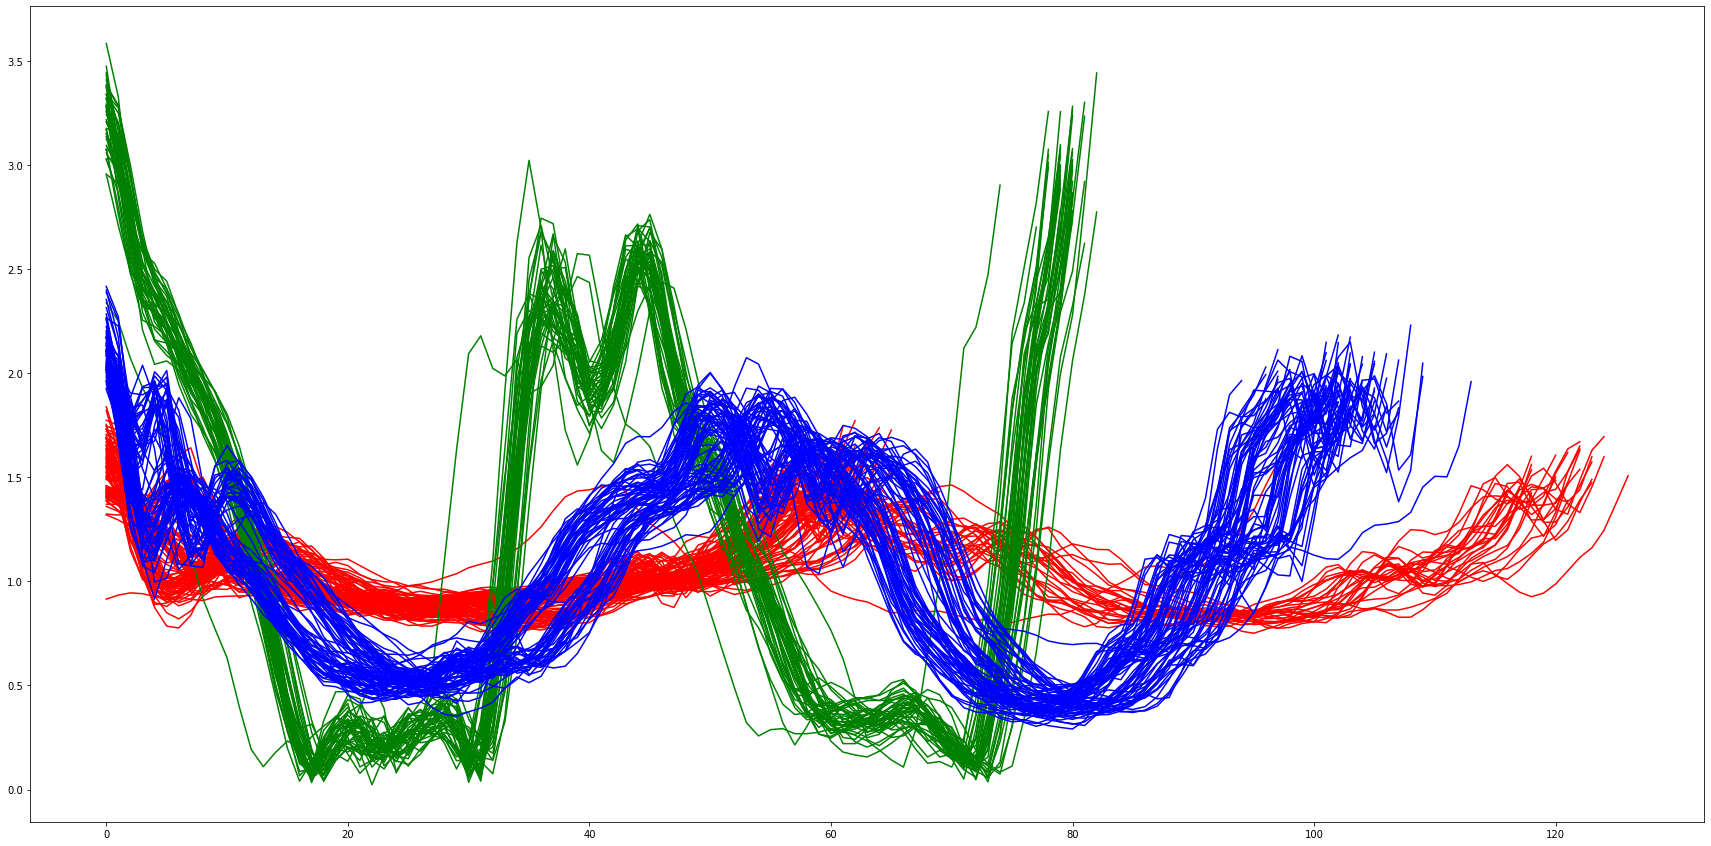

In [24]:
# Access the clusters and centroids attributes

colors = ['red', 'green', 'blue']
for k in range(km.k_clusters):
    cluster = np.array(X, dtype = object)[np.where(np.array(km.clusters) == k)[0]]
    for arr in cluster:
        plt.plot(arr, color = colors[k])

In [25]:
# Soft clustering returns the distance from each instance to each centroid

km.soft_cluster()[:10] # shape: (X.shape[0] x centroids.shape[0])

array([[2.46580869, 2.26780343, 2.59693848],
       [2.48637081, 2.7032497 , 2.57383666],
       [2.43498051, 2.49217482, 2.50907291],
       [2.6521319 , 2.63370999, 2.70822809],
       [2.54345127, 2.4400483 , 2.64522204],
       [2.35908952, 2.46028473, 2.3005933 ],
       [2.33907432, 2.4521685 , 2.21471192],
       [2.29366899, 2.29707611, 2.38617435],
       [2.25479211, 2.17614707, 2.34689817],
       [1.97737046, 1.687601  , 2.11545818]])

In [26]:
# Match an incoming time series array to nearest centroid

print('Clustered Labels:', [km.clusters[0], km.clusters[80]])
print('Predicted Labels:', km.predict([X[0], X[80]]))

Clustered Labels: [2, 1]
Predicted Labels: [2, 1]
